In [1]:
from google.cloud import vision
from google.cloud.vision import types
import io
from PIL import Image, ImageDraw
from enum import Enum

### Set Secret 

In [2]:
secret_path =  "secret/googleServiceAcc.json"

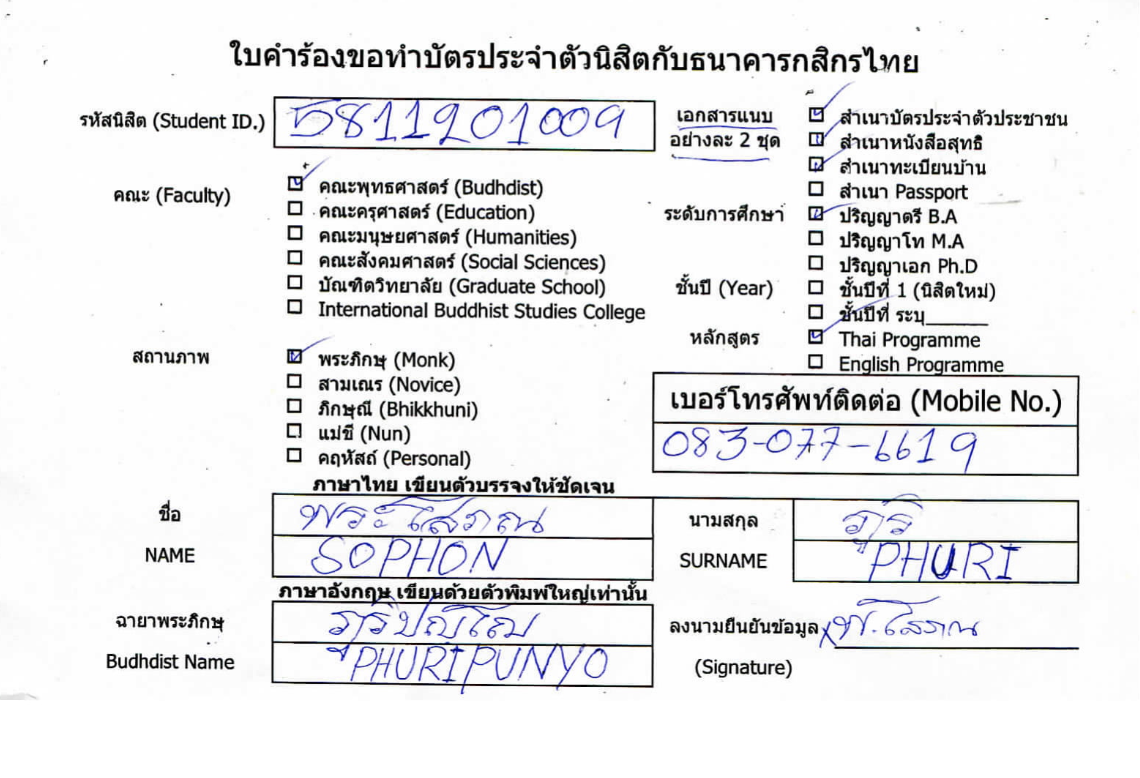

In [30]:

image_file='resource/sample_doc2.png'
# image_file='resource/sample_doc_r.png'
# image_file='resource/doc01BW.jpg'
# image_file='resource/doc01zoom.png'
# image_file='resource/doc01zoomH.png'
image  = Image.open(image_file)
image

In [31]:
client = vision.ImageAnnotatorClient.from_service_account_json(secret_path)
with io.open(image_file, 'rb') as image_file1:
        content = image_file1.read()
content_image = types.Image(content=content)

In [32]:
#API Call
response = client.document_text_detection(image=content_image)
document = response.full_text_annotation

In [33]:
print(document.text)

ใบคำร้องขอทำบัตรประจำตัวนิสิตกับธนาคารกสิกรไทย
รหัสนิสิต (Student ID.)| 31110104
คณะ (Faculty)
สถานภาพ
เอกสารแนบ M สำเนาบัตรประจําตัวประชาชน
อย่างละ 2 ชุด F ส่าเนาหนังสือสุทธิ
a สำเนาทะเบียนบ้าน
9 คณะพุทธศาสตร์ (Budhdist)
ปี สาเนา Passport
1. คณะครุศาสตร์ (Education)
ระดับการศึกษา ปริญญาตรี B.A
0 คณะมนุษยศาสตร์ (Humanities)
D ปริญญาโท M.A
คณะสังคมศาสตร์ (Social Sciences)
D ปริญญาเอก Ph.D
[ บัณฑิตวิทยาลัย (Graduate School) ชั้นปี (Year) 0 ชั้นปีที่ 1 (นิสิตใหม่)
International Buddhist Studies College
- D ชั้นปีที่ ระบุ
หลักสูตร M Thai Programme
พระภิกษุ (Monk)
English Programme
สามเณร (Novice)
เบอร์โทรศัพท์ติดต่อ (Mobile No.)
ภิกษุณี (Bhikkhuni)
L! แม่ชี (Nun)
083-044-619
1 คฤหัสถ์ (Personal)
ภาษาไทย เขียนตัวบรรจงให้ชัดเจน
9Ws: 585)
นามสกุล
SOPHON
SURNAME PHURT
ภาษาอังกฤษ เขียนด้วยตัวพิมพ์ใหญ่เท่านั้น
3753/ /
(Signature)
ชื่อ
NAME
ฉายาพระภิกษุ
ลงนามยืนยันข้อมูล ช.604
Signature)
Budhdist Name
PHURİ PUNYO



In [34]:
class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5
def draw_boxes(image, bounds, color,width=5):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        draw.line([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y,
            bound.vertices[0].x, bound.vertices[0].y],fill=color, width=width)
    return image

def get_document_bounds(response, feature):
    bounds=[]
    for i,page in enumerate(document.pages):
        for block in page.blocks:
            if feature==FeatureType.BLOCK:
                bounds.append(block.bounding_box)
            for paragraph in block.paragraphs:
                if feature==FeatureType.PARA:
                    bounds.append(paragraph.bounding_box)
                for word in paragraph.words:
                    for symbol in word.symbols:
                        if (feature == FeatureType.SYMBOL):
                            bounds.append(symbol.bounding_box)
                    if (feature == FeatureType.WORD):
                        bounds.append(word.bounding_box)
    return bounds

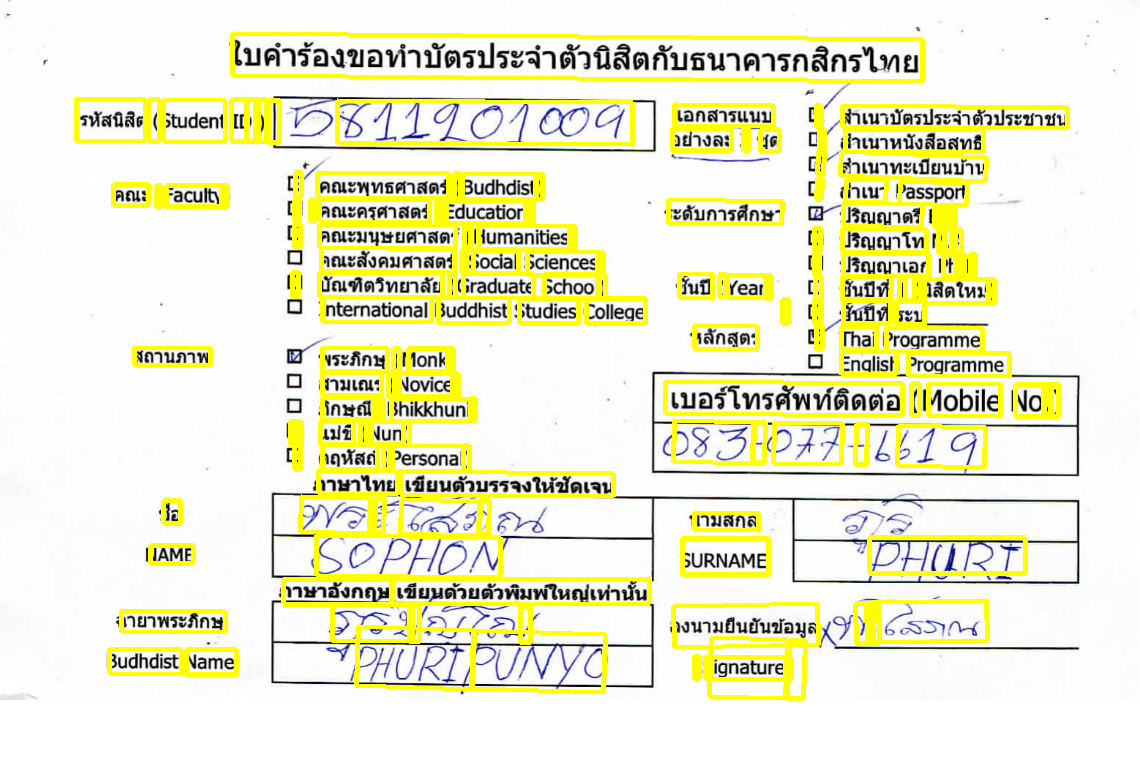

In [35]:
bounds = get_document_bounds(response, FeatureType.WORD)
draw_boxes(image, bounds, 'yellow')